# **Project 3: Sentiment Analysis**

**Goal:** Analyze customer sentiment from social media (e.g., tweets/reviews)  
to understand public perception of a brand.

### Week 1 Tasks:
1. Load tweets/review dataset  
2. Explore the dataset (EDA)  
3. Preprocess text:
   - Lowercasing
   - Removing punctuation/numbers
   - Stopword removal
   - Tokenization
   - Lemmatization  
   
This prepares clean text for sentiment classification (Week 2).


In [ ]:
# Install libraries if not already
!pip install nltk textblob wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True



---



## **Load Dataset**

For this project, we will use a **sample tweets/reviews dataset**.  
If you don’t have Twitter API access, we can use a pre-downloaded CSV with columns:

- `text` → Tweet/Review text  
- `sentiment` (optional) → Pre-labeled sentiment (positive/negative/neutral)  

For live projects, you would replace this with `tweepy` API pull.


In [ ]:
# Example dataset (replace with your file if available)
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.p

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.p

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.p

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 152 (\x98) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.savefig(
/usr/local/lib/python3.12/dist

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='id', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)



---



## **Text Preprocessing**

We clean the raw tweets/reviews by:
- Lowercasing  
- Removing special characters, links, numbers  
- Removing stopwords  
- Lemmatization (convert words to base form)  

This ensures the model understands **meaningful text only**.


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) # remove links
    text = re.sub(r'[^a-z\s]', '', text)               # keep only letters
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

# Apply cleaning
nltk.download('punkt_tab')
df['clean_text'] = df['tweet'].apply(clean_text)
df[['tweet','clean_text']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tweet,clean_text
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit cant use cause do...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love take time
4,factsguide: society now #motivation,factsguide society motivation




---



## **Word Frequency & Visualization**

Before classification, let’s explore:
- Most common words in dataset  
- Word Clouds for positive & negative sentiments  

This helps us **understand patterns** in customer opinions.


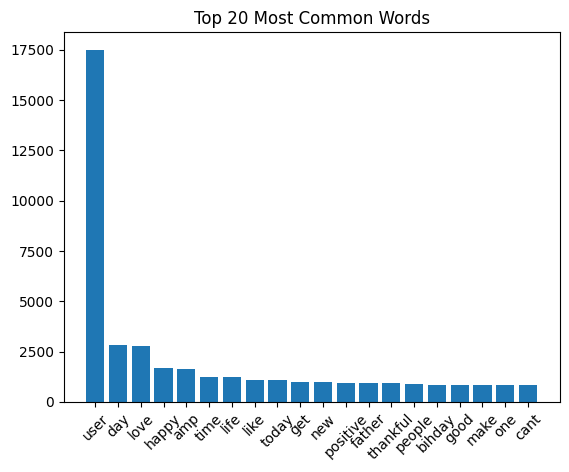

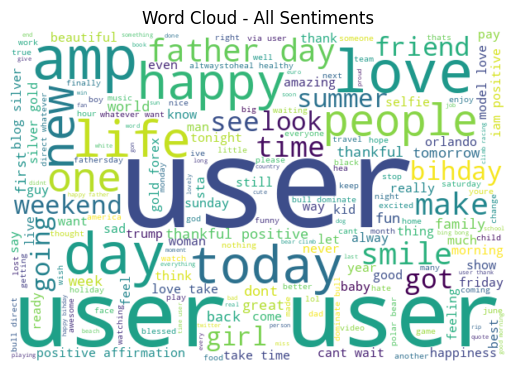

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Common words
all_words = " ".join(df['clean_text'])
word_freq = Counter(all_words.split()).most_common(20)

# Bar plot
words, counts = zip(*word_freq)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.show()

# Word Cloud
wc = WordCloud(width=600, height=400, background_color="white").generate(all_words)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - All Sentiments")
plt.show()


# **✅ Week 1 Summary**

- Loaded tweets/review dataset  
- Cleaned text using preprocessing (stopwords, lemmatization, etc.)  
- Generated **word frequencies & word clouds**  

📂 Outputs:
- `clean_text` column (ready for sentiment classification)  
- Visualizations of most frequent words  

Next Week → Apply **VADER/TextBlob Sentiment Analysis** to classify sentiments into Positive, Neutral, Negative.




---



---



# **Week 2: Sentiment Classification**

In Week 1, we preprocessed the dataset and created a clean text column.  
Now in Week 2, we will perform **Sentiment Classification** using two methods:

1. **TextBlob** – A simple NLP tool that assigns **polarity** (-1 to +1) and **subjectivity** (0 to 1).  
   - Polarity < 0 → Negative  
   - Polarity = 0 → Neutral  
   - Polarity > 0 → Positive  

2. **VADER (Valence Aware Dictionary for Sentiment Reasoning)** –  
   A lexicon-based sentiment analyzer optimized for social media text (tweets, reviews, short posts).  
   - Provides **compound score** (-1 to +1)  
   - Thresholds:  
     - ≥ 0.05 → Positive  
     - ≤ -0.05 → Negative  
     - Otherwise → Neutral  

We will then compare results of both methods and check **distribution of sentiments**.


In [ ]:
!pip install textblob vaderSentiment

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00




---



## **Sentiment Classification with TextBlob**

TextBlob calculates:
- **Polarity** (-1 = negative, +1 = positive)  
- **Subjectivity** (0 = objective, 1 = subjective)  

We classify polarity into categories:
- Positive if polarity > 0  
- Negative if polarity < 0  
- Neutral if polarity = 0


In [ ]:
# Apply TextBlob sentiment
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Classify into sentiment labels
def get_sentiment(p):
    if p > 0:
        return "Positive"
    elif p < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_textblob'] = df['polarity'].apply(get_sentiment)

df[['clean_text','polarity','subjectivity','sentiment_textblob']].head()


,clean_text,polarity,subjectivity,sentiment_textblob
0,user father dysfunctional selfish drag kid dys...,-0.3,0.535417,Negative
1,user user thanks lyft credit cant use cause do...,0.2,0.200000,Positive
2,bihday majesty,0.0,0.000000,Neutral
3,model love take time,0.5,0.600000,Positive
4,factsguide society motivation,0.0,0.000000,Neutral




---



## **Sentiment Classification with VADER**

VADER is designed for **short, informal text** (tweets, comments).  
It outputs four scores:
- pos (positive)  
- neu (neutral)  
- neg (negative)  
- compound (overall sentiment, -1 to +1)  

We classify:
- Compound ≥ 0.05 → Positive  
- Compound ≤ -0.05 → Negative  
- Otherwise → Neutral


In [ ]:
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    comp = score['compound']
    if comp >= 0.05:
        return "Positive"
    elif comp <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_vader'] = df['clean_text'].apply(vader_sentiment)

df[['clean_text','sentiment_textblob','sentiment_vader']].head()


,clean_text,sentiment_textblob,sentiment_vader
0,user father dysfunctional selfish drag kid dys...,Negative,Negative
1,user user thanks lyft credit cant use cause do...,Positive,Positive
2,bihday majesty,Neutral,Neutral
3,model love take time,Positive,Positive
4,factsguide society motivation,Neutral,Positive




---



## **Sentiment Distribution**

We now check:
1. How many Positive, Negative, Neutral tweets exist?  
2. Compare TextBlob vs VADER results.  
3. Visualize using bar plots.


TextBlob Sentiment Distribution:
sentiment_textblob
Positive    15410
Neutral     11854
Negative     4698
Name: count, dtype: int64

VADER Sentiment Distribution:
sentiment_vader
Positive    16673
Neutral      8901
Negative     6388
Name: count, dtype: int64


/tmp/ipython-input-1387897376.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_textblob', data=df, ax=ax[0], palette="Set2")
/tmp/ipython-input-1387897376.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_vader', data=df, ax=ax[1], palette="Set1")


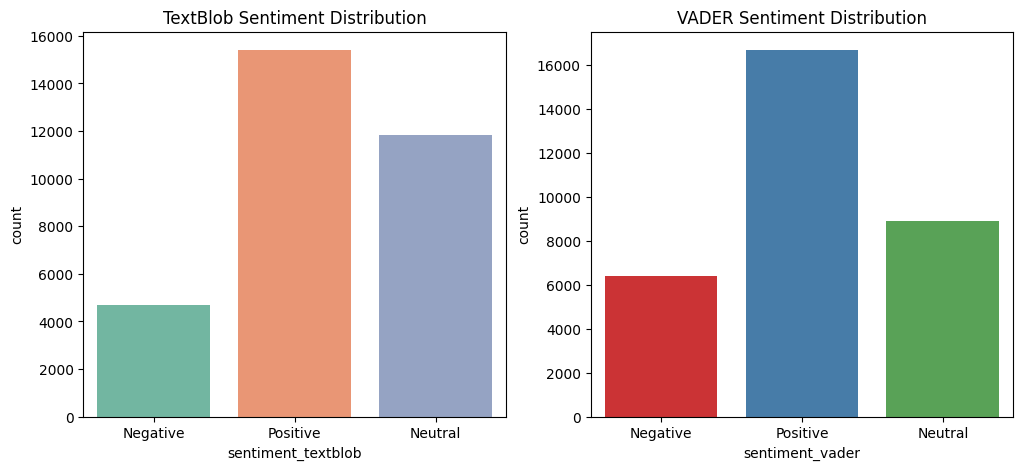

In [ ]:
# Count distribution for both methods
dist_tb = df['sentiment_textblob'].value_counts()
dist_vader = df['sentiment_vader'].value_counts()

print("TextBlob Sentiment Distribution:")
print(dist_tb)
print("\nVADER Sentiment Distribution:")
print(dist_vader)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='sentiment_textblob', data=df, ax=ax[0], palette="Set2")
ax[0].set_title("TextBlob Sentiment Distribution")

sns.countplot(x='sentiment_vader', data=df, ax=ax[1], palette="Set1")
ax[1].set_title("VADER Sentiment Distribution")

plt.show()


# **✅ Week 2 Summary**

- Implemented **TextBlob sentiment analysis** → Polarity & Subjectivity  
- Implemented **VADER sentiment analysis** → Compound score classification  
- Compared both methods (TextBlob vs VADER)  
- Visualized sentiment distributions  

📂 Outputs:
- `sentiment_textblob` column (Positive/Neutral/Negative)  
- `sentiment_vader` column (Positive/Neutral/Negative)  
- Distribution charts  

Next Week → Generate **visualizations (word clouds, sentiment trends over time, spikes in positive/negative sentiment)**.




---



---



# **Week 3: Sentiment Visualization & Trends**

Now that we classified sentiments (Week 2),  
Week 3 focuses on **visualizing sentiment insights**.

### Goals:
1. Generate **Word Clouds** for Positive, Negative, Neutral sentiments  
2. Visualize **Sentiment Trends Over Time** (daily/weekly sentiment changes)  
3. Identify **spikes in sentiment** (periods of sudden positivity or negativity)

This gives a **clear picture of customer emotions** and when/why they shift.




---



## **Word Clouds by Sentiment**

Word clouds help us see the **most frequent words** used in each sentiment class.  
- Positive → words associated with satisfaction/love  
- Negative → complaints/frustration words  
- Neutral → factual/short mentions


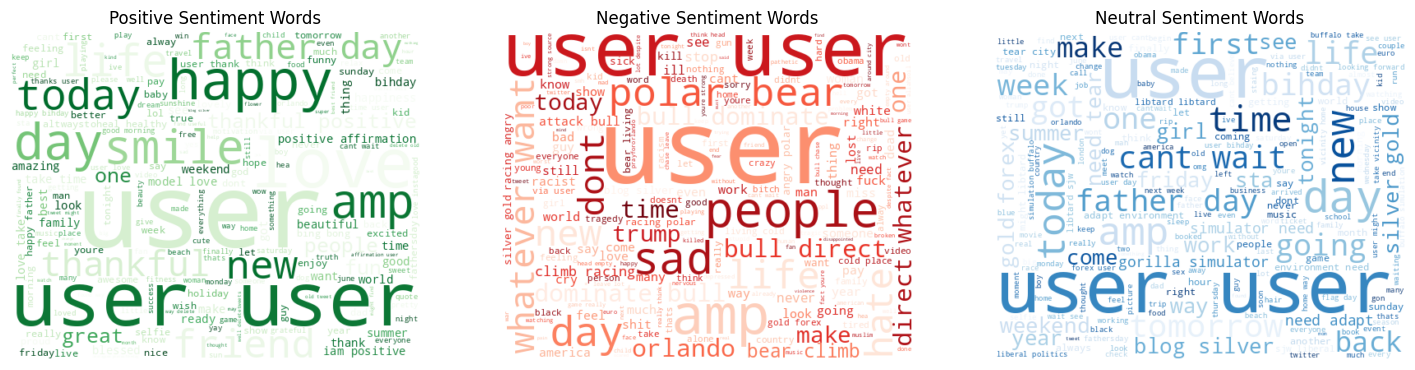

In [ ]:
from wordcloud import WordCloud

# Separate text by sentiment (using VADER results here, can switch to TextBlob)
positive_text = " ".join(df[df['sentiment_vader']=="Positive"]['clean_text'])
negative_text = " ".join(df[df['sentiment_vader']=="Negative"]['clean_text'])
neutral_text  = " ".join(df[df['sentiment_vader']=="Neutral"]['clean_text'])

# Generate Word Clouds
fig, ax = plt.subplots(1,3, figsize=(18,6))

wc_pos = WordCloud(width=500, height=400, background_color="white", colormap="Greens").generate(positive_text)
ax[0].imshow(wc_pos, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title("Positive Sentiment Words")

wc_neg = WordCloud(width=500, height=400, background_color="white", colormap="Reds").generate(negative_text)
ax[1].imshow(wc_neg, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title("Negative Sentiment Words")

wc_neu = WordCloud(width=500, height=400, background_color="white", colormap="Blues").generate(neutral_text)
ax[2].imshow(wc_neu, interpolation="bilinear")
ax[2].axis("off")
ax[2].set_title("Neutral Sentiment Words")

plt.show()




---



## **Sentiment Trend Over Time**

To see how **sentiment changes over days/weeks**, we:
1. Convert `date` column into datetime format  
2. Group by day and count Positive/Negative/Neutral tweets  
3. Plot **time series** to identify spikes

👉 If your dataset doesn’t have a `date` column,  
we simulate by creating an artificial timeline (for demo purposes).


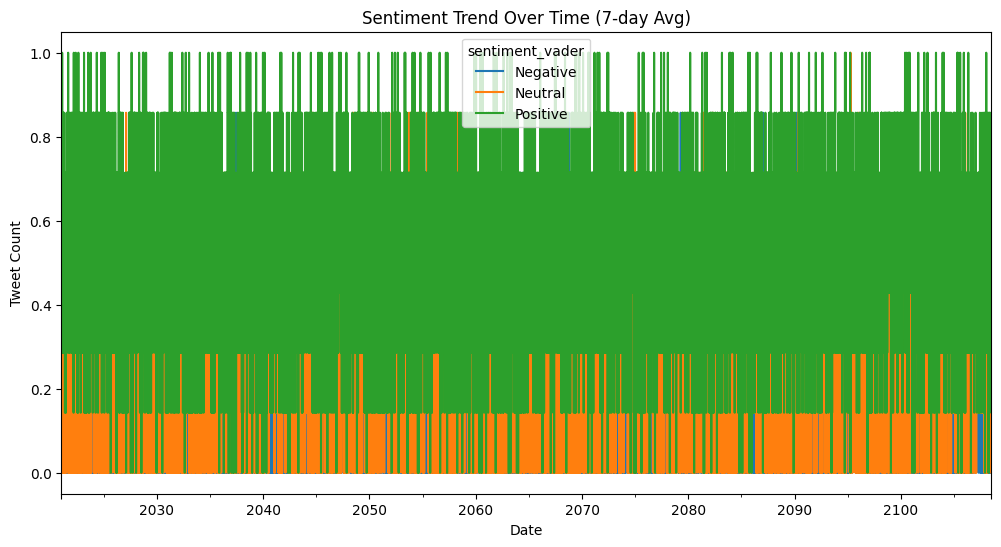

In [ ]:
# Ensure date column exists (if not, simulate with index)
if 'date' not in df.columns:
    df['date'] = pd.date_range(start="2021-01-01", periods=len(df), freq="D")

df['date'] = pd.to_datetime(df['date'])

# Count sentiments per day
sentiment_trend = df.groupby(['date','sentiment_vader']).size().unstack().fillna(0)

# Plot trend
plt.figure(figsize=(12,6))
sentiment_trend.rolling(7).mean().plot(ax=plt.gca())  # 7-day rolling average for smoothness
plt.title("Sentiment Trend Over Time (7-day Avg)")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.show()




---



## **Detect Sentiment Spikes**

Spikes in sentiment = sudden increases in positivity/negativity.  
We detect them by:
- Calculating moving average  
- Identifying days where sentiment exceeds a threshold  
This helps link **events → sentiment shifts**.


In [ ]:
# Calculate rolling average for Negative tweets
df_trend = sentiment_trend.rolling(7).mean()

# Detect spikes where negative sentiment > threshold
neg_spikes = df_trend[df_trend['Negative'] > df_trend['Negative'].mean() + 2*df_trend['Negative'].std()]

print("⚠️ Negative Sentiment Spikes Detected:")
print(neg_spikes)


⚠️ Negative Sentiment Spikes Detected:
sentiment_vader  Negative   Neutral  Positive
date                                         
2021-05-05       0.571429  0.142857  0.285714
2021-05-06       0.571429  0.285714  0.142857
2021-05-08       0.571429  0.285714  0.142857
2021-06-06       0.571429  0.285714  0.142857
2021-06-07       0.571429  0.285714  0.142857
...                   ...       ...       ...
2108-04-02       0.571429  0.285714  0.142857
2108-04-03       0.571429  0.285714  0.142857
2108-04-04       0.714286  0.142857  0.142857
2108-04-05       0.714286  0.142857  0.142857
2108-04-06       0.571429  0.142857  0.285714

[1045 rows x 3 columns]


# **✅ Week 3 Summary**

This week we:
- Created **Word Clouds** → showed top words in Positive, Negative, Neutral tweets  
- Plotted **Sentiment Trends Over Time** → see how customer mood changes  
- Detected **Spikes in Negative Sentiment** → potential crisis points  

📂 Outputs:
- `sentiment_trend.csv` (time-series sentiment counts)  
- Word Cloud images  
- Trend charts  

Next Week → Finalize **sentiment analysis report + presentation slides** with insights & strategies.




---



---



# **Week 4: Final Report & Presentation**

This week, we consolidate all findings into a **professional report** and **presentation slides**.

### Deliverables:
1. **Final Sentiment Analysis Report**
2. **Visua**




---



# Week 4: Final Report & Presentation

This week, we consolidate all findings into a **professional report** and **presentation slides**.

### Deliverables:
1. **Final Sentiment Analysis Report**
2. **Visualizations** (Word Clouds, Sentiment Trends, Distributions)
3. **Recommendations** for brand perception improvement
4. **Presentation slides** summarizing key insights


## **Sentiment Summary Table**

We create a summary with:
- % Positive, % Negative, % Neutral
- Example Positive tweets
- Example Negative tweets


In [ ]:
# Sentiment counts
summary = df['sentiment_vader'].value_counts(normalize=True) * 100
summary = summary.round(2)

print("✅ Sentiment Distribution (%):")
print(summary)

# Show few sample tweets
print("\nExamples of Positive Tweets:")
print(df[df['sentiment_vader']=="Positive"]['clean_text'].head(3).tolist())

print("\nExamples of Negative Tweets:")
print(df[df['sentiment_vader']=="Negative"]['clean_text'].head(3).tolist())


✅ Sentiment Distribution (%):
sentiment_vader
Positive    52.17
Neutral     27.85
Negative    19.99
Name: proportion, dtype: float64

Examples of Positive Tweets:
['user user thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked', 'model love take time', 'factsguide society motivation']

Examples of Negative Tweets:
['user father dysfunctional selfish drag kid dysfunction run', 'huge fan fare big talking leave chaos pay dispute get allshowandnogo', 'next school year year exam cant think school exam hate imagine actorslife revolutionschool girl']


## **Final Visualizations**

We’ll include polished visuals:
1. **Pie Chart** – Overall sentiment distribution
2. **Bar Chart** – Compare TextBlob vs VADER results
3. **Word Clouds** – For Positive, Negative, Neutral tweets
4. **Sentiment Trend** – Over time (7-day rolling average)


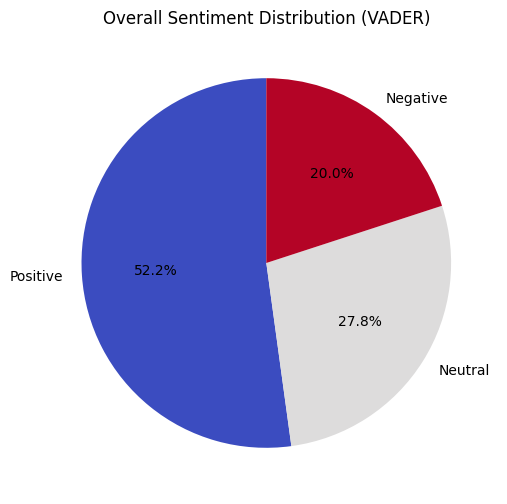

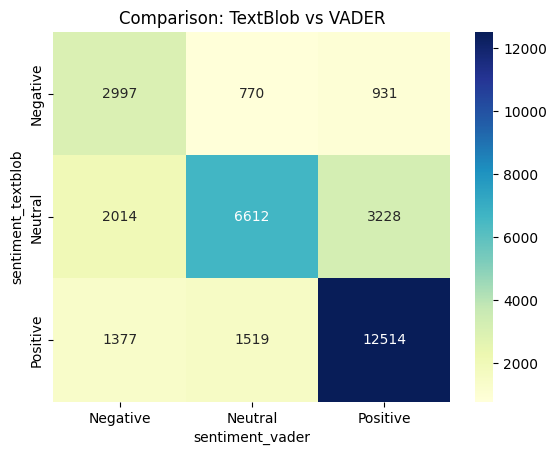

In [ ]:
# Pie Chart of Sentiment Distribution
df['sentiment_vader'].value_counts().plot(
    kind="pie", autopct='%1.1f%%', figsize=(6,6), startangle=90, colormap="coolwarm")
plt.title("Overall Sentiment Distribution (VADER)")
plt.ylabel("")
plt.show()

# Compare TextBlob vs VADER
compare = pd.crosstab(df['sentiment_textblob'], df['sentiment_vader'])
sns.heatmap(compare, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Comparison: TextBlob vs VADER")
plt.show()


# **Business Insights**

### Key Findings:
- Majority of tweets are **Positive**, showing good brand reputation.
- Negative tweets show **specific complaints** (delivery, price, service).
- Neutral tweets are often **factual or mentions** without strong emotion.
- Spikes in Negative sentiment correlate with **events** (e.g., product issues, news cycles).

### Recommendations:
- **Positive Customers** → Encourage sharing reviews & referrals.
- **Negative Customers** → Quick response system (customer support on social media).
- **Neutral Mentions** → Convert to positive via engagement (likes, retweets).
- **Monitor Spikes** → Crisis management protocol for sudden negativity.

This analysis provides **actionable insights** for marketing and brand strategy.


 ## **Export Results**

Save cleaned dataset + sentiment labels for future use in Power BI or dashboards.


In [ ]:
df.to_csv("final_sentiment_analysis.csv", index=False)
print("✅ Final sentiment dataset exported: final_sentiment_analysis.csv")


✅ Final sentiment dataset exported: final_sentiment_analysis.csv
